In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the [motor vehicle dataset from OpenNYC](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/data) which I prefiltered to accidents involving bikes

In [3]:
bike_collisions = pd.read_csv('/content/drive/My Drive/CMPE 255 Project/data/nyc_bike_accidents/Motor_Vehicle_Collisions_Crashes.csv')
bike_collisions['CRASH DATE'] =  pd.to_datetime(bike_collisions['CRASH DATE'])
bike_collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2016-06-25,15:00,MANHATTAN,10019.0,40.765675,-73.976240,"(40.765675, -73.97624)",CENTRAL PARK SOUTH,AVENUE OF THE AMERICAS,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3470283,Sedan,Bike,NaN,NaN,NaN
1,2016-06-26,17:20,BRONX,10469.0,40.865547,-73.861570,"(40.865547, -73.86157)",BRONXWOOD AVENUE,ALLERTON AVENUE,NaN,1.0,0.0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3473690,Bike,4 dr sedan,NaN,NaN,NaN
2,2016-06-21,8:52,QUEENS,11354.0,40.759647,-73.829796,"(40.759647, -73.829796)",NaN,NaN,136-14 ROOSEVELT AVENUE,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3465363,4 dr sedan,Bike,NaN,NaN,NaN
3,2016-06-21,4:00,NaN,NaN,40.686497,-73.916800,"(40.686497, -73.9168)",BROADWAY,HANCOCK STREET,NaN,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3465214,Bus,Bike,NaN,NaN,NaN
4,2016-06-09,22:40,MANHATTAN,10003.0,40.733715,-73.988220,"(40.733715, -73.98822)",NaN,NaN,140 EAST 14 STREET,1.0,0.0,0,0,1,0,0,0,Passenger Distraction,Unspecified,NaN,NaN,NaN,4023539,4 dr sedan,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29922,2013-11-13,23:10,MANHATTAN,10036.0,40.756320,-73.987620,"(40.75632, -73.98762)",NaN,NaN,213 WEST 42 STREET,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4028370,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
29923,2013-08-04,21:00,BROOKLYN,11201.0,40.693490,-73.979170,"(40.69349, -73.97917)",MYRTLE AVENUE,NAVY STREET,NaN,1.0,0.0,1,0,0,0,0,0,Traffic Control Disregarded,NaN,NaN,NaN,NaN,3532767,Bike,NaN,NaN,NaN,NaN
29924,2013-08-05,8:30,BROOKLYN,11212.0,40.668700,-73.919100,"(40.6687, -73.9191)",NaN,NaN,1283 EAST NEW YORK AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4184688,Motorbike,NaN,NaN,NaN,NaN
29925,2013-03-21,22:45,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",BUSHWICK AVENUE,NaN,NaN,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4023755,Bike,NaN,NaN,NaN,NaN


In [ ]:
bike_collisions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29927 entries, 0 to 29926
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE                     29927 non-null  datetime64[ns]
 1   CRASH TIME                     29927 non-null  object        
 2   BOROUGH                        21412 non-null  object        
 3   ZIP CODE                       21412 non-null  float64       
 4   LATITUDE                       27725 non-null  float64       
 5   LONGITUDE                      27725 non-null  float64       
 6   LOCATION                       27725 non-null  object        
 7   ON STREET NAME                 23278 non-null  object        
 8   CROSS STREET NAME              17389 non-null  object        
 9   OFF STREET NAME                6600 non-null   object        
 10  NUMBER OF PERSONS INJURED      29925 non-null  float64       
 11  NUMBER OF PERSO

In [ ]:
num_bike_collisions = pd.DataFrame(bike_collisions[bike_collisions['CRASH DATE'] >= '2016-03-01'].groupby('CRASH DATE')['COLLISION_ID'].count()).reset_index()
num_bike_collisions.columns = ['date', 'num_crashes']

path = '/content/drive/My Drive/CMPE 255 Project/data/bike_accidents/accident_count_agg.csv'
num_bike_collisions.to_csv(path, index=False)

# Look at distribution of accident reasons

In [ ]:
bike_collision_reasons = bike_collisions[['CRASH DATE', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 2', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 3', 'CONTRIBUTING FACTOR VEHICLE 3', 'VEHICLE TYPE CODE 4', 'CONTRIBUTING FACTOR VEHICLE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 5']]

def func(x):
    if x['VEHICLE TYPE CODE 1'] == 'Bike':
        return x['CONTRIBUTING FACTOR VEHICLE 1']
    elif x['VEHICLE TYPE CODE 2'] == 'Bike':
        return x['CONTRIBUTING FACTOR VEHICLE 2']
    elif x['VEHICLE TYPE CODE 3'] == 'Bike':
        return x['CONTRIBUTING FACTOR VEHICLE 3']
    elif x['VEHICLE TYPE CODE 4'] == 'Bike':
        return x['CONTRIBUTING FACTOR VEHICLE 4']
    elif x['VEHICLE TYPE CODE 5'] == 'Bike':
        return x['CONTRIBUTING FACTOR VEHICLE 5']
    return None

bike_collision_reasons['Accident_Reason'] = bike_collision_reasons.apply(func, axis=1)
bike_collision_reasons = bike_collision_reasons.drop_duplicates()
bike_collision_reasons

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,CRASH DATE,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 3,CONTRIBUTING FACTOR VEHICLE 3,VEHICLE TYPE CODE 4,CONTRIBUTING FACTOR VEHICLE 4,VEHICLE TYPE CODE 5,CONTRIBUTING FACTOR VEHICLE 5,Accident_Reason
0,2016-06-25,3470283,Sedan,Driver Inattention/Distraction,Bike,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction
1,2016-06-26,3473690,Bike,Failure to Yield Right-of-Way,4 dr sedan,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,Failure to Yield Right-of-Way
2,2016-06-21,3465363,4 dr sedan,Following Too Closely,Bike,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified
3,2016-06-21,3465214,Bus,Driver Inattention/Distraction,Bike,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified
4,2016-06-09,4023539,4 dr sedan,Passenger Distraction,Bike,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29922,2013-11-13,4028370,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,Bike,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction
29923,2013-08-04,3532767,Bike,Traffic Control Disregarded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Traffic Control Disregarded
29924,2013-08-05,4184688,Motorbike,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
29925,2013-03-21,4023755,Bike,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified


In [ ]:
bike_collision_reasons.groupby('Accident_Reason')['COLLISION_ID'].nunique()

Accident_Reason
80                                                           1
Aggressive Driving/Road Rage                                72
Alcohol Involvement                                        144
Animals Action                                              17
Backing Unsafely                                            60
Brakes Defective                                            43
Cell Phone (hand-Held)                                      12
Cell Phone (hands-free)                                      2
Driver Inattention/Distraction                            4162
Driver Inexperience                                        304
Driverless/Runaway Vehicle                                   7
Drugs (illegal)                                              1
Failure to Keep Right                                       38
Failure to Yield Right-of-Way                             1230
Fatigued/Drowsy                                              8
Fell Asleep                            

### Overall distribution

<Figure size 432x288 with 0 Axes>

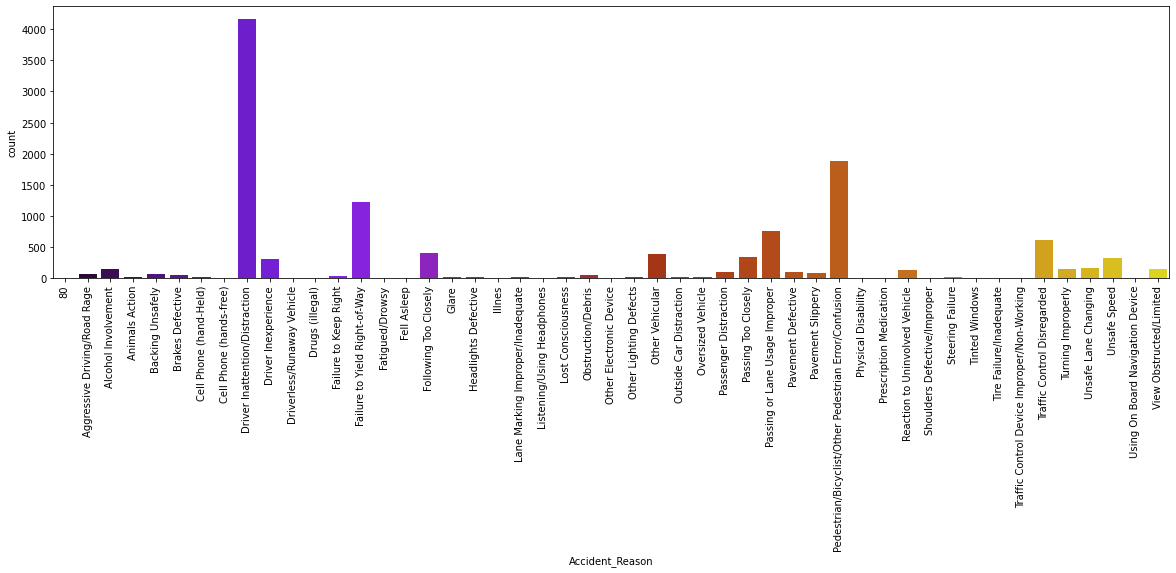

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Accident_Reason", data=bike_collision_reasons[bike_collision_reasons['Accident_Reason'] != 'Unspecified'].sort_values('Accident_Reason'), palette="gnuplot")
plt.xticks(rotation=90)
plt.show()

### Summer months

<Figure size 432x288 with 0 Axes>

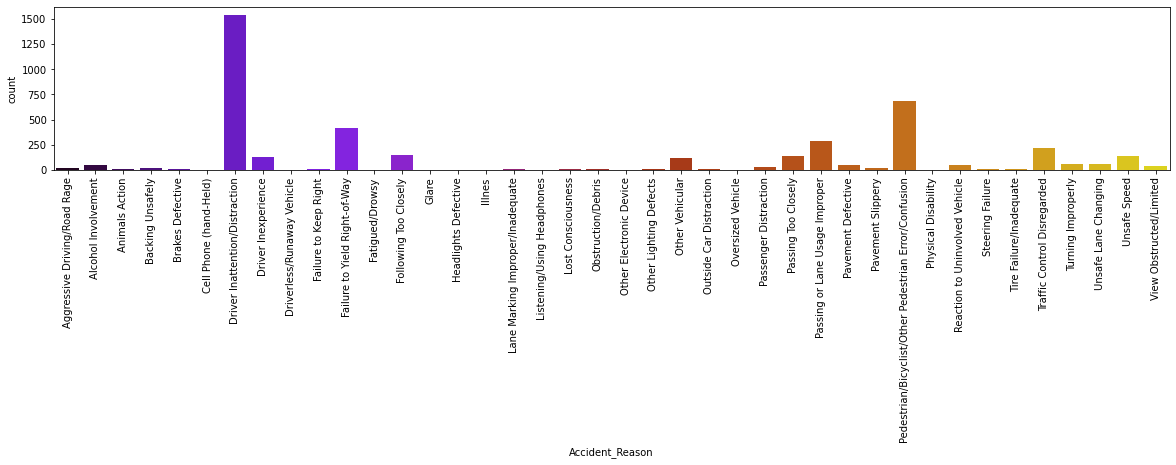

In [ ]:
subset_bike_collision_reasons = bike_collision_reasons[(bike_collision_reasons['Accident_Reason'] != 'Unspecified') & (bike_collision_reasons['CRASH DATE'].dt.month >= 6) & (bike_collision_reasons['CRASH DATE'].dt.month <= 8)]

plt.clf()
fig, ax = plt.subplots(figsize=(20, 3))
sns.countplot(x="Accident_Reason", data=subset_bike_collision_reasons.sort_values('Accident_Reason'), palette="gnuplot")
plt.xticks(rotation=90)
plt.show()

### Winter months

<Figure size 432x288 with 0 Axes>

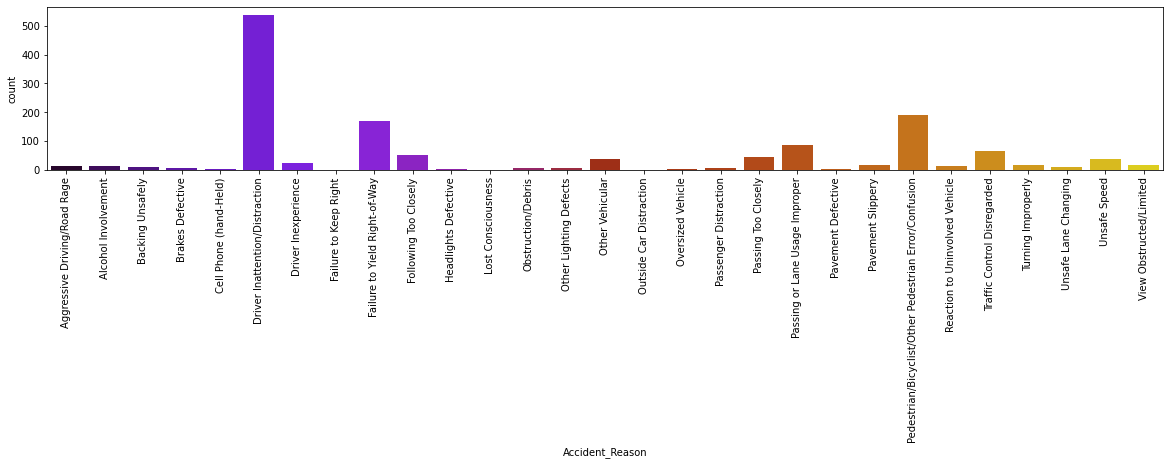

In [ ]:
subset_bike_collision_reasons = bike_collision_reasons[(bike_collision_reasons['Accident_Reason'] != 'Unspecified') & ((bike_collision_reasons['CRASH DATE'].dt.month <= 2) | (bike_collision_reasons['CRASH DATE'].dt.month >= 12))]

plt.clf()
fig, ax = plt.subplots(figsize=(20, 3))
sns.countplot(x="Accident_Reason", data=subset_bike_collision_reasons.sort_values('Accident_Reason'), palette="gnuplot")
plt.xticks(rotation=90)
plt.show()

# Look at number of people injuried over time

In [ ]:
print('# collisions with injuries: {}'.format(len(bike_collisions[bike_collisions['NUMBER OF PERSONS INJURED'] > 0])))
print('# collisions: {}'.format(len(bike_collisions)))

# collisions with injuries: 23861
# collisions: 29927


<Figure size 432x288 with 0 Axes>

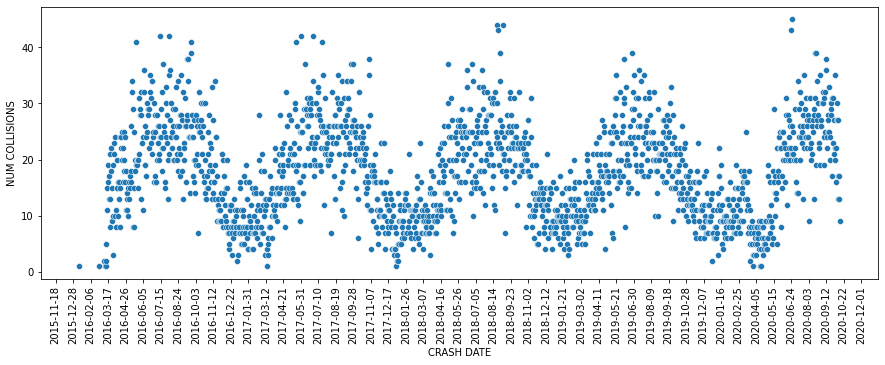

In [13]:
collision_injuries = bike_collisions.groupby('CRASH DATE')['COLLISION_ID'].count().to_frame().reset_index()
collision_injuries.columns = ['CRASH DATE', 'NUM COLLISIONS']
collision_injuries = collision_injuries[collision_injuries['CRASH DATE'] >= '2016-01-01']

plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x="CRASH DATE", y="NUM COLLISIONS", data=collision_injuries.sort_values('CRASH DATE'))
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
plt.xticks(rotation=90)
plt.show()

# Code to plot number of collisions per day
# collision_counts = bike_collisions.groupby('CRASH DATE')['COLLISION_ID'].count().to_frame().reset_index()
# collision_counts.columns = ['CRASH DATE', 'NUM_COLLISIONS']
# plt.clf()
# fig, ax = plt.subplots(figsize=(40, 7))
# sns.scatterplot(x="CRASH DATE", y="NUM_COLLISIONS", data=collision_counts.sort_values('CRASH DATE'))
# ax.xaxis.set_major_locator(plt.MaxNLocator(156))
# plt.xticks(rotation=90)
# plt.show()